## Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.preprocessing import Imputer -> 더 이상 지원하지 않음
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier

pd.set_option('display.max_columns', 100)

## Loading Data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

bin: 이진 특성  
cat: 범주형 특성  
기타 변수: 연속형 혹은 순서형  
-1: 값 누락  
target: 청구 여부  

In [3]:
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [4]:
train.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [5]:
train.shape

(595212, 59)

In [6]:
print(train.duplicated().sum()) # 중복된 행이 존재하지 않으므로 중복 제거 실행하지 않음

0


In [7]:
# train.drop_duplicates() # 중복된 행 제거하지만 원본 데이터에는 영향x
# train.shape

In [8]:
test.shape # target 변수 하나 빠짐

(892816, 58)

14개의 범주형 데이터에 대해서는 get_dummies로 이진 데이터로 변환하고, bin 변수들은 이미 이진 데이터이므로 별도로 더미 처리할 필요가 없다.

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

데이터 타입이 int형과 float형으로 이루어져있다.  
결측치가 -1로 채워졌기 때문이다.  
이 부분은 나중에 자세히 살펴보겠다.

## Meta Data
데이터 관리를 용이하게 하기 위해 변수들에 대한 메타 정보를 DataFrame에 저장  
- role: 입력(input), ID, 타겟(target)
- level: 명목형(nominal), 구간형(interval), 서열형(ordinal), 이진형(binary)
- keep: True 또는 False (해당 변수를 사용할지 여부)
- dtype: 정수(int), 실수(float), 문자열(str)
명목형: 서로 구분되는 범주나 이름만을 가진 변수 ex) 성별, 혈액형, 도시이름..  

In [10]:
data = []
for f in train.columns:
    # Defining the role
    if f == 'target':
        role = 'target'
    elif f == 'id':
        role = 'id'
    else:
        role = 'input'
         
    # Defining the level
    if 'bin' in f or f == 'target':
        level = 'binary'
    elif 'cat' in f or f == 'id':
        level = 'nominal'
    elif train[f].dtype == float:
        level = 'interval'
    else:
        level = 'ordinal'
        
    # Initialize keep to True for all variables except for id
    keep = True
    if f == 'id':
        keep = False
    
    # Defining the data type 
    dtype = train[f].dtype
    
    # Creating a Dict that contains all the metadata for the variable
    f_dict = {
        'varname': f,
        'role': role,
        'level': level,
        'keep': keep,
        'dtype': dtype
    }
    data.append(f_dict)
    
meta = pd.DataFrame(data, columns=['varname', 'role', 'level', 'keep', 'dtype'])
meta.set_index('varname', inplace=True)


In [11]:
meta

,role,level,keep,dtype
varname,,,,
id,id,nominal,False,int64
target,target,binary,True,int64
ps_ind_01,input,ordinal,True,int64
ps_ind_02_cat,input,nominal,True,int64
ps_ind_03,input,ordinal,True,int64
ps_ind_04_cat,input,nominal,True,int64
ps_ind_05_cat,input,nominal,True,int64
ps_ind_06_bin,input,binary,True,int64
ps_ind_07_bin,input,binary,True,int64


In [12]:
meta[(meta.level == 'nominal') & (meta.keep)].index

Index(['ps_ind_02_cat', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_car_01_cat',
       'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat',
       'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat',
       'ps_car_10_cat', 'ps_car_11_cat'],
      dtype='object', name='varname')

명목형 변수는 숫자 간에 의미를 가지고 있지 않기 때문에 인코딩을 진행해주어야 한다.

In [13]:
pd.DataFrame({'count' : meta.groupby(['role', 'level'])['role'].size()}).reset_index()

,role,level,count
0,id,nominal,1
1,input,binary,17
2,input,interval,10
3,input,nominal,14
4,input,ordinal,16
5,target,binary,1


## Descriptive statistics (기술 통계)

데이터프레임의 describe() 메서드를 사용하여 기술 통계를 얻을 수 있지만, 범주형 변수나 ID 변수에 대해 이 통계를 계산하는 것은 의미가 없다.  
따라서 '메타 파일'을 활용하여 기술 통계가 유의미한 변수들만 선택하고, 이들을 데이터 타입별로 구분하여 분석을 진행함으로써 결과를 더 명확하게 만들겠다는 계획을 제시한다.  

### Interval variables

In [14]:
v = meta[(meta.level == 'interval') & (meta.keep)].index # 구간
train[v].describe()

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.610991,0.439184,0.551102,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849
std,0.287643,0.404264,0.793506,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153
min,0.000000,0.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.200000,0.525000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000
50%,0.700000,0.300000,0.720677,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000
75%,0.900000,0.600000,1.000000,0.400000,0.906190,0.396485,3.605551,0.700000,0.700000,0.700000
max,0.900000,1.800000,4.037945,1.264911,3.720626,0.636396,3.741657,0.900000,0.900000,0.900000


1. reg 변수 그룹  
결측치: ps_reg_03에만 결측값이 존재  
변수 범위: 변수마다 범위가 다르며, 스케일링(e.g., StandardScaler) 적용을 고려(사용할 분류기 종류에 따라 결정)  
2. car 변수 그룹  
결측치: ps_car_12와 ps_car_15에 결측값이 존재  
변수 범위: reg 그룹과 마찬가지로 범위가 다르며, 스케일링을 고려  
3. calc 변수 그룹  
결측치: 결측값이 없다.  
분포: 세 개의 _calc 변수들이 매우 유사한 분포  

### Ordinal variables

In [15]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index # 서열형
print(v)
train[v].describe()

Index(['ps_ind_01', 'ps_ind_03', 'ps_ind_14', 'ps_ind_15', 'ps_car_11',
       'ps_calc_04', 'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08',
       'ps_calc_09', 'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13',
       'ps_calc_14'],
      dtype='object', name='varname')


,ps_ind_01,ps_ind_03,ps_ind_14,ps_ind_15,ps_car_11,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,1.900378,4.423318,0.012451,7.299922,2.346072,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026
std,1.983789,2.699902,0.127545,3.546042,0.832548,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,2.000000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,3.000000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,3.000000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,3.000000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


결측치: ps_car_11만 결측치가 있다.  
변수 범위: 범위가 다르며, 스케일링을 고려

### Binary variables

In [16]:
v = meta[(meta.level == 'binary') & (meta.keep)].index
train[v].describe()

,target,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.660823,0.121081,0.153446,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.473430,0.326222,0.360417,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 불균형 클래스 처리
target=1인 레코드의 비율이 target=0에 비해 훨씬 적다.  
이는 모델의 정확도(accuracy)는 높게 나올 수 있지만, 실제로는 별다른 가치를 제공하지 못하는 상황을 초래할 수 있다.  
이 문제를 해결하기 위한 두 가지 가능한 전략:  
- target=1인 레코드를 오버샘플링(oversampling) 하기
- target=0인 레코드를 언더샘플링(undersampling) 하기  
우리의 경우 학습 데이터셋이 상당히 크기 때문에, 언더샘플링 전략을 선택한다.

In [17]:
desired_apriori=0.10 # 줄이고자 하는 비율

idx_0 = train[train.target == 0].index # target이 0인 인덱스 
idx_1 = train[train.target == 1].index # target이 1인 인덱스 

nb_0 = len(train.loc[idx_0]) # target이 0인 개수 
nb_1 = len(train.loc[idx_1]) # target이 1인 개수 

undersampling_rate = ((1-desired_apriori)*nb_1)/(nb_0*desired_apriori) # target 0이 줄어야 하는 비율
undersampled_nb_0 = int(undersampling_rate*nb_0) # 줄어든 target 0의 개수
print('Rate to undersample records with target=0: {}'.format(undersampling_rate))
print('Number of records with target=0 after undersampling: {}'.format(undersampled_nb_0))

# target이 0인 레코드들의 인덱스 리스트에서 무작위로 undersampled_nb_0 개수만큼 선택
undersampled_idx = shuffle(idx_0, random_state=37, n_samples=undersampled_nb_0)

# target=0에 대해서 줄어든 인덱스 와 target=1 인덱스는 그대로 사용
idx_list = list(undersampled_idx) + list(idx_1)

# 데이터에서 위 인덱스들만 선택해서 새로 구성한 데이터프레임 = train
train = train.loc[idx_list].reset_index(drop=True)

Rate to undersample records with target=0: 0.34043569687437886
Number of records with target=0 after undersampling: 195246


### Data quality Checks

#### Checkiing missing values

In [18]:
train.isna().mean() # -1에 대한 결측치 값은 찾지 못하기 때문에 0으로 나옴
# train.replace(-1, np.nan, inplace=True) 이렇게 코드를 추가해주면, 해당 코드로 결측치 발견 가능

id                0.0
target            0.0
ps_ind_01         0.0
ps_ind_02_cat     0.0
ps_ind_03         0.0
ps_ind_04_cat     0.0
ps_ind_05_cat     0.0
ps_ind_06_bin     0.0
ps_ind_07_bin     0.0
ps_ind_08_bin     0.0
ps_ind_09_bin     0.0
ps_ind_10_bin     0.0
ps_ind_11_bin     0.0
ps_ind_12_bin     0.0
ps_ind_13_bin     0.0
ps_ind_14         0.0
ps_ind_15         0.0
ps_ind_16_bin     0.0
ps_ind_17_bin     0.0
ps_ind_18_bin     0.0
ps_reg_01         0.0
ps_reg_02         0.0
ps_reg_03         0.0
ps_car_01_cat     0.0
ps_car_02_cat     0.0
ps_car_03_cat     0.0
ps_car_04_cat     0.0
ps_car_05_cat     0.0
ps_car_06_cat     0.0
ps_car_07_cat     0.0
ps_car_08_cat     0.0
ps_car_09_cat     0.0
ps_car_10_cat     0.0
ps_car_11_cat     0.0
ps_car_11         0.0
ps_car_12         0.0
ps_car_13         0.0
ps_car_14         0.0
ps_car_15         0.0
ps_calc_01        0.0
ps_calc_02        0.0
ps_calc_03        0.0
ps_calc_04        0.0
ps_calc_05        0.0
ps_calc_06        0.0
ps_calc_07

In [19]:
vars_with_missing = []  # 결측치가 있는 변수들을 담을 빈 리스트 생성

for f in train.columns:  # train 데이터프레임의 모든 컬럼에 대해서 
    missings = train[train[f] == -1][f].count()  # 값이 -1인 행의 개수(결측치 개수)를 계산
    if missings > 0:  # 만약 결측치가 1개라도 있으면
        vars_with_missing.append(f)  # 그 변수명을 리스트에 추가
        missings_perc = missings / train.shape[0]  # 전체 행 수 대비 결측치 비율 계산
        
        # 변수명, 결측치 개수, 결측치 비율(%) 출력
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))
        
# 결측치가 있는 변수 총 개수 출력
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

Variable ps_ind_02_cat has 103 records (0.05%) with missing values
Variable ps_ind_04_cat has 51 records (0.02%) with missing values
Variable ps_ind_05_cat has 2256 records (1.04%) with missing values
Variable ps_reg_03 has 38580 records (17.78%) with missing values
Variable ps_car_01_cat has 62 records (0.03%) with missing values
Variable ps_car_02_cat has 2 records (0.00%) with missing values
Variable ps_car_03_cat has 148367 records (68.39%) with missing values
Variable ps_car_05_cat has 96026 records (44.26%) with missing values
Variable ps_car_07_cat has 4431 records (2.04%) with missing values
Variable ps_car_09_cat has 230 records (0.11%) with missing values
Variable ps_car_11 has 1 records (0.00%) with missing values
Variable ps_car_14 has 15726 records (7.25%) with missing values
In total, there are 12 variables with missing values


In [20]:
# ps_car_03_cat, ps_car_05_cat 두 변수를 삭제할 변수 리스트로 지정
vars_to_drop = ['ps_car_03_cat', 'ps_car_05_cat'] # 결측치가 너무 많아서 거
train.drop(vars_to_drop, inplace=True, axis=1)
meta.loc[(vars_to_drop),'keep'] = False 

In [22]:
from sklearn.impute import SimpleImputer

mean_imp = SimpleImputer(missing_values=-1, strategy='mean')  # axis 제거
mode_imp = SimpleImputer(missing_values=-1, strategy='most_frequent')  # axis 제거

train['ps_reg_03'] = mean_imp.fit_transform(train[['ps_reg_03']]).ravel()
train['ps_car_12'] = mean_imp.fit_transform(train[['ps_car_12']]).ravel()
train['ps_car_14'] = mean_imp.fit_transform(train[['ps_car_14']]).ravel()
train['ps_car_11'] = mode_imp.fit_transform(train[['ps_car_11']]).ravel()

In [23]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    dist_values = train[f].value_counts().shape[0]
    print('Variable {} has {} distinct values'.format(f, dist_values))

Variable ps_ind_02_cat has 5 distinct values
Variable ps_ind_04_cat has 3 distinct values
Variable ps_ind_05_cat has 8 distinct values
Variable ps_car_01_cat has 13 distinct values
Variable ps_car_02_cat has 3 distinct values
Variable ps_car_04_cat has 10 distinct values
Variable ps_car_06_cat has 18 distinct values
Variable ps_car_07_cat has 3 distinct values
Variable ps_car_08_cat has 2 distinct values
Variable ps_car_09_cat has 6 distinct values
Variable ps_car_10_cat has 3 distinct values
Variable ps_car_11_cat has 104 distinct values


### 타겟 인코딩(target encoding)
- 범주형 변수(categorical feature)를 모델에 넣기 위해 숫자로 변환하는 기법 중 하나
- 각 범주(category)를 해당 범주에 속한 데이터들의 타겟값(target)의 평균값으로 바꾸는 방법

In [24]:
def add_noise(series, noise_level): # 노이즈를 약간 추가해서 과적합을 줄이려는 함수
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None,  # 타겟 인코딩 함수
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0): 
    assert len(trn_series) == len(target) # 학습 데이터와 타겟 길이가 같아야 함
    assert trn_series.name == tst_series.name # 학습/테스트 변수명이 같아야 함
    temp = pd.concat([trn_series, target], axis=1) # 학습 + 타겟값 = temp
    # 각 범주별로 타겟의 평균과 개 계산
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # 스무딩(smoothing) 계산
    # 샘플 개수가 적을 때는 평균을 덜 믿고, 많을 때는 평균을 더 믿는 가중치 계산
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))

    # 전체 타겟값의 평균
    prior = target.mean()

    # 스무딩을 적용한 최종 평균값 계산
    #샘플이 적으면 전체 평균(prior) 쪽으로 가중치가 더 많고, 많으면 카테고리 평균에 더 가깝게 됨
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)

    # 학습 데이터의 각 카테고리를 위에서 구한 평균값으로 변환 (타겟 인코딩 적용)
    # 만약 해당 카테고리가 없으면 전체 평균값으로 대체
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)

    # 원래 인덱스를 복원
    ft_trn_series.index = trn_series.index 

    # 테스트 데이터도 마찬가지로 인코딩 (학습 데이터에서 구한 평균값 사용)
    # 없는 카테고리는 전체 평균으로 대체
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    ft_tst_series.index = tst_series.index

    # 노이즈를 더한 학습용, 테스트용 인코딩된 시리즈 반환
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

In [25]:
train_encoded, test_encoded = target_encode(train["ps_car_11_cat"], 
                             test["ps_car_11_cat"], 
                             target=train.target, 
                             min_samples_leaf=100,
                             smoothing=10,
                             noise_level=0.01)
    
train['ps_car_11_cat_te'] = train_encoded
train.drop('ps_car_11_cat', axis=1, inplace=True)
meta.loc['ps_car_11_cat','keep'] = False
test['ps_car_11_cat_te'] = test_encoded
test.drop('ps_car_11_cat', axis=1, inplace=True)

### Exploratory Data Visualization
특정 범주값이 타겟 1과 얼마나 연관이 높은지 한눈에 보기  

- 범주형 변수의 각 값이 타겟과 어떤 관계를 갖는지 파악
- 타겟에 긍정적(또는 부정적) 영향을 주는 범주가 무엇인지 파악
- 변수의 중요도, 특징, 의미를 직관적으로 이해
- 모델링 시 어떤 범주가 의미 있는지 판단하는 데 도움

<Figure size 640x480 with 0 Axes>

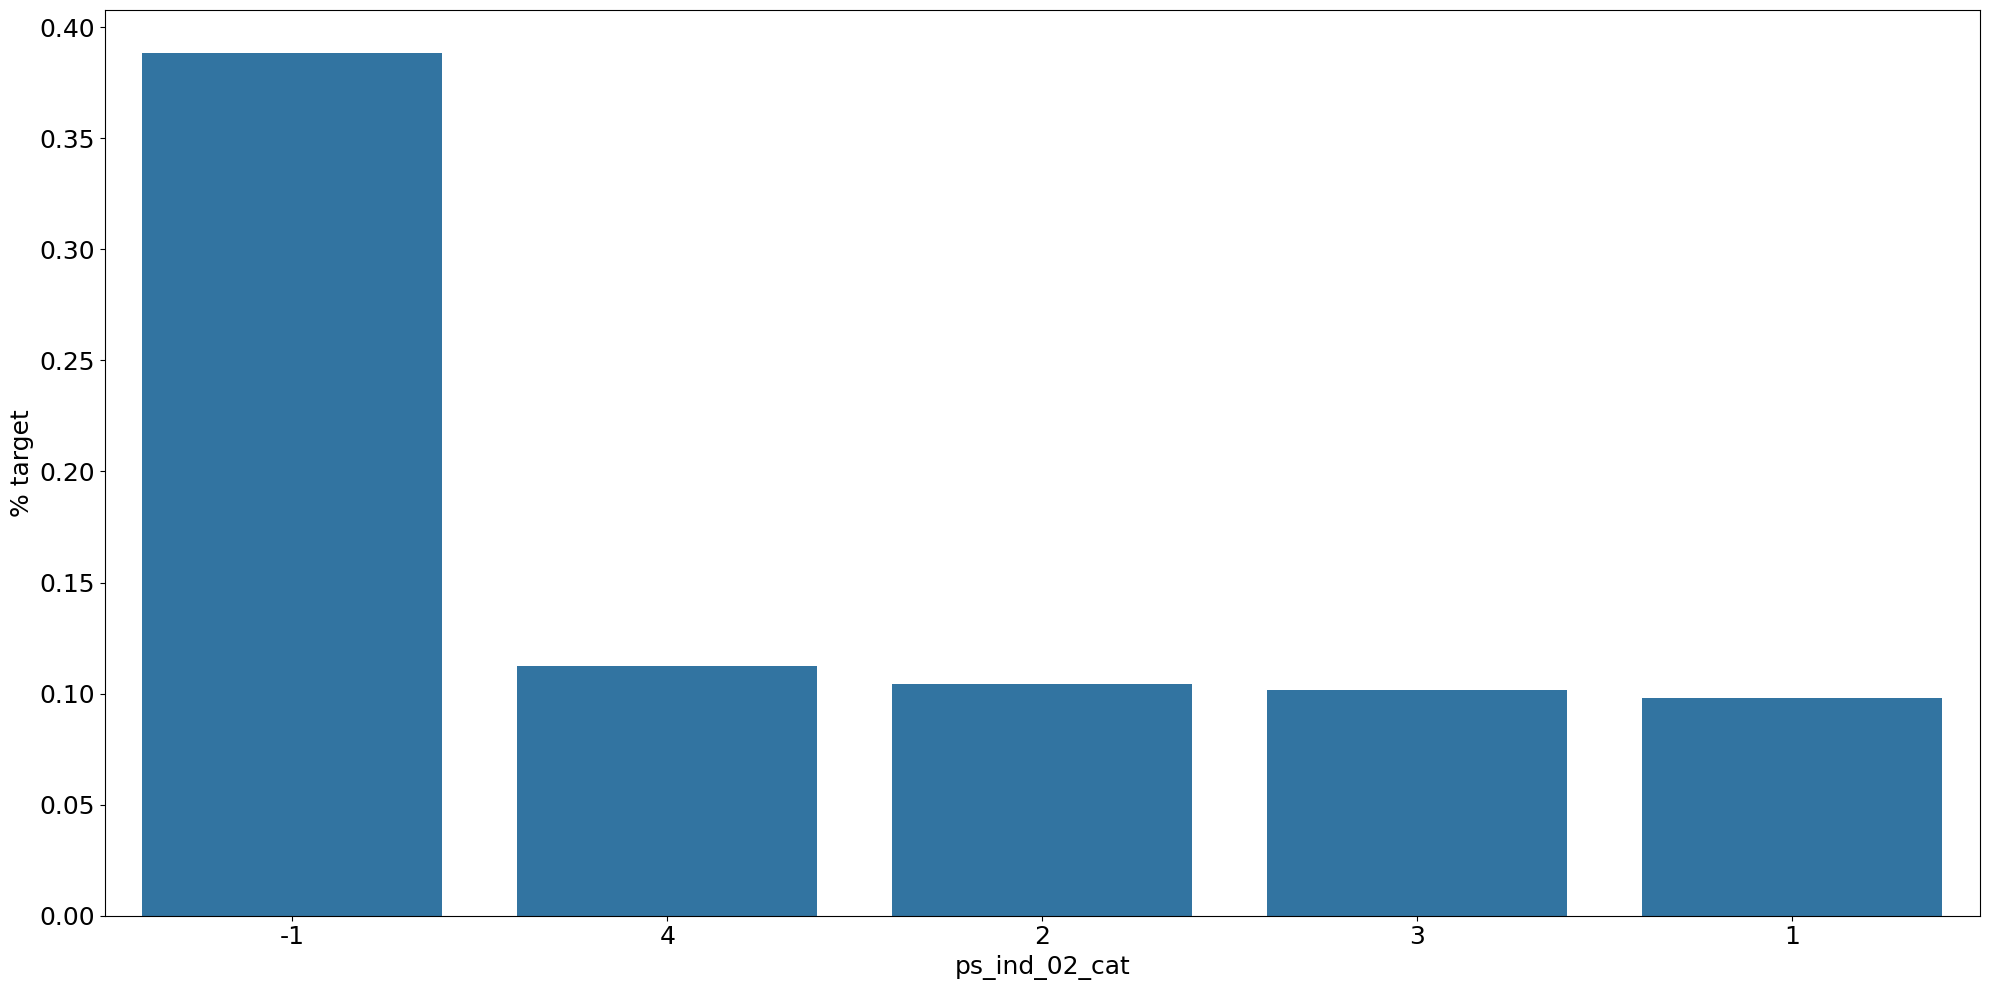

<Figure size 640x480 with 0 Axes>

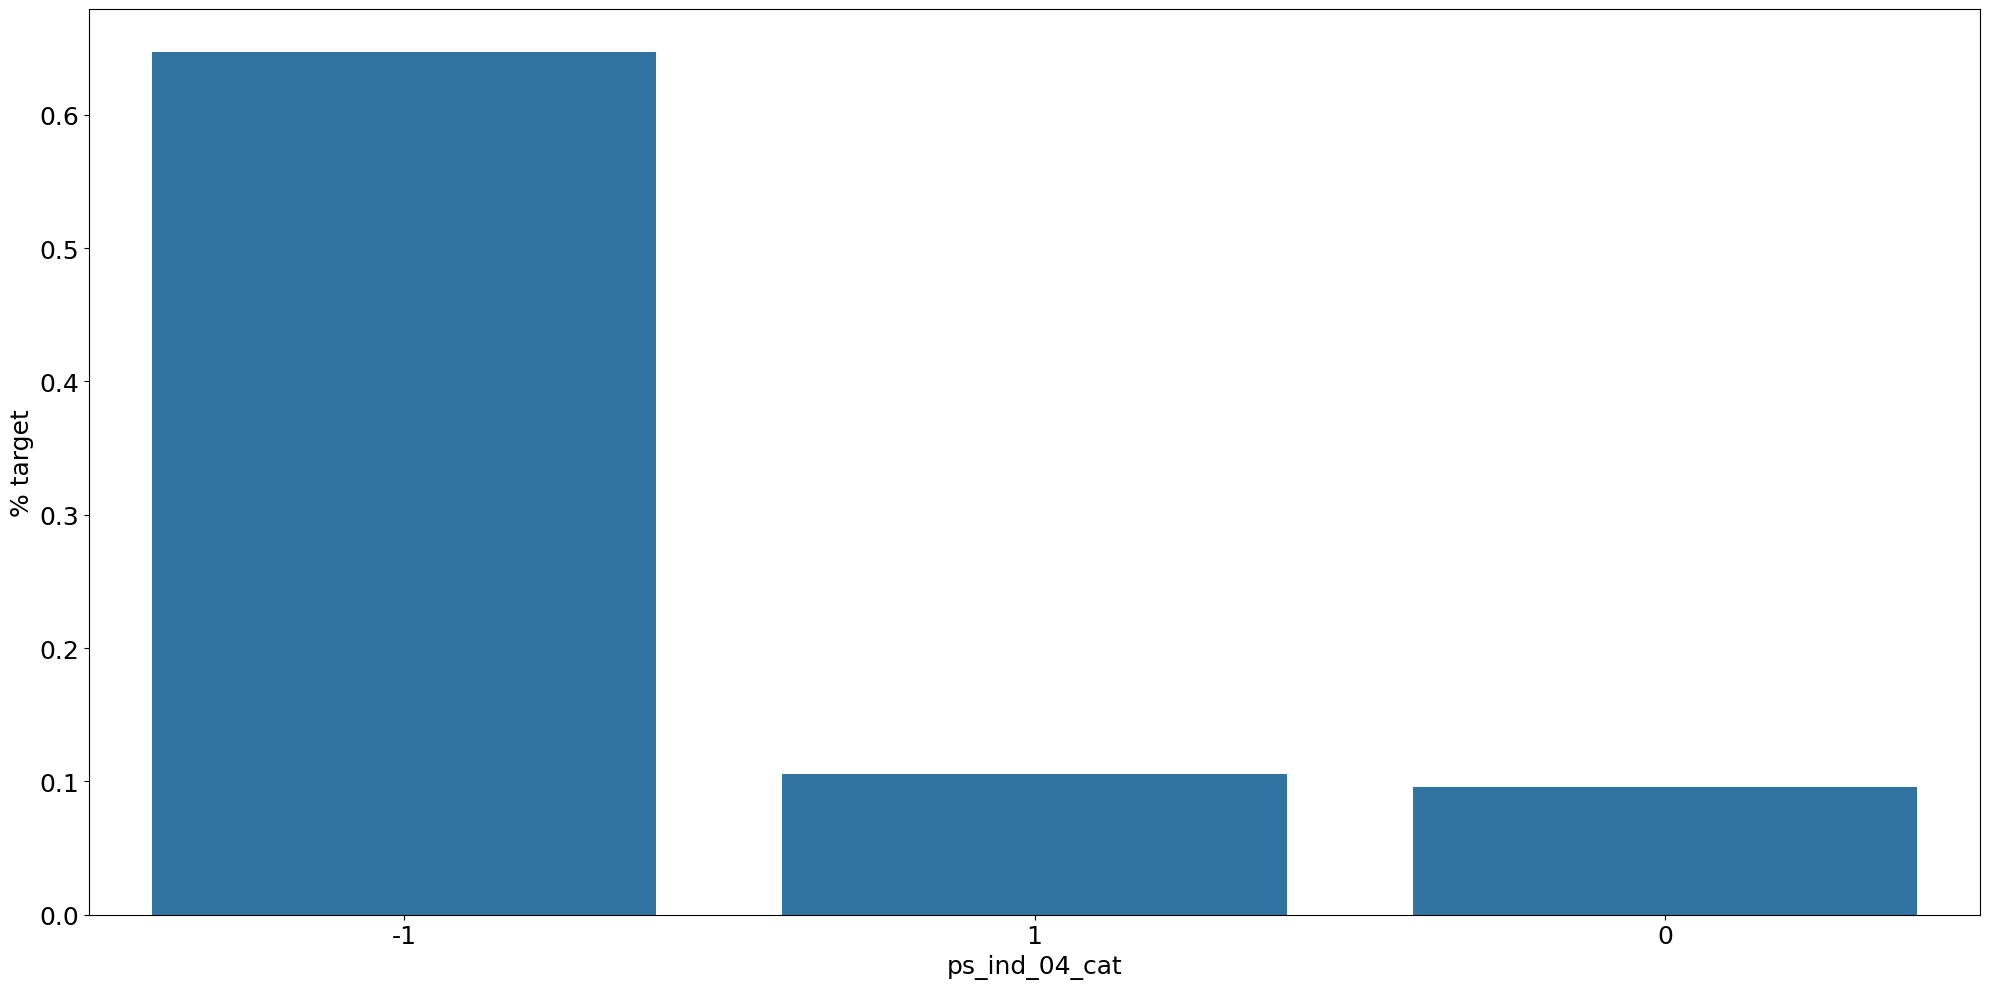

<Figure size 640x480 with 0 Axes>

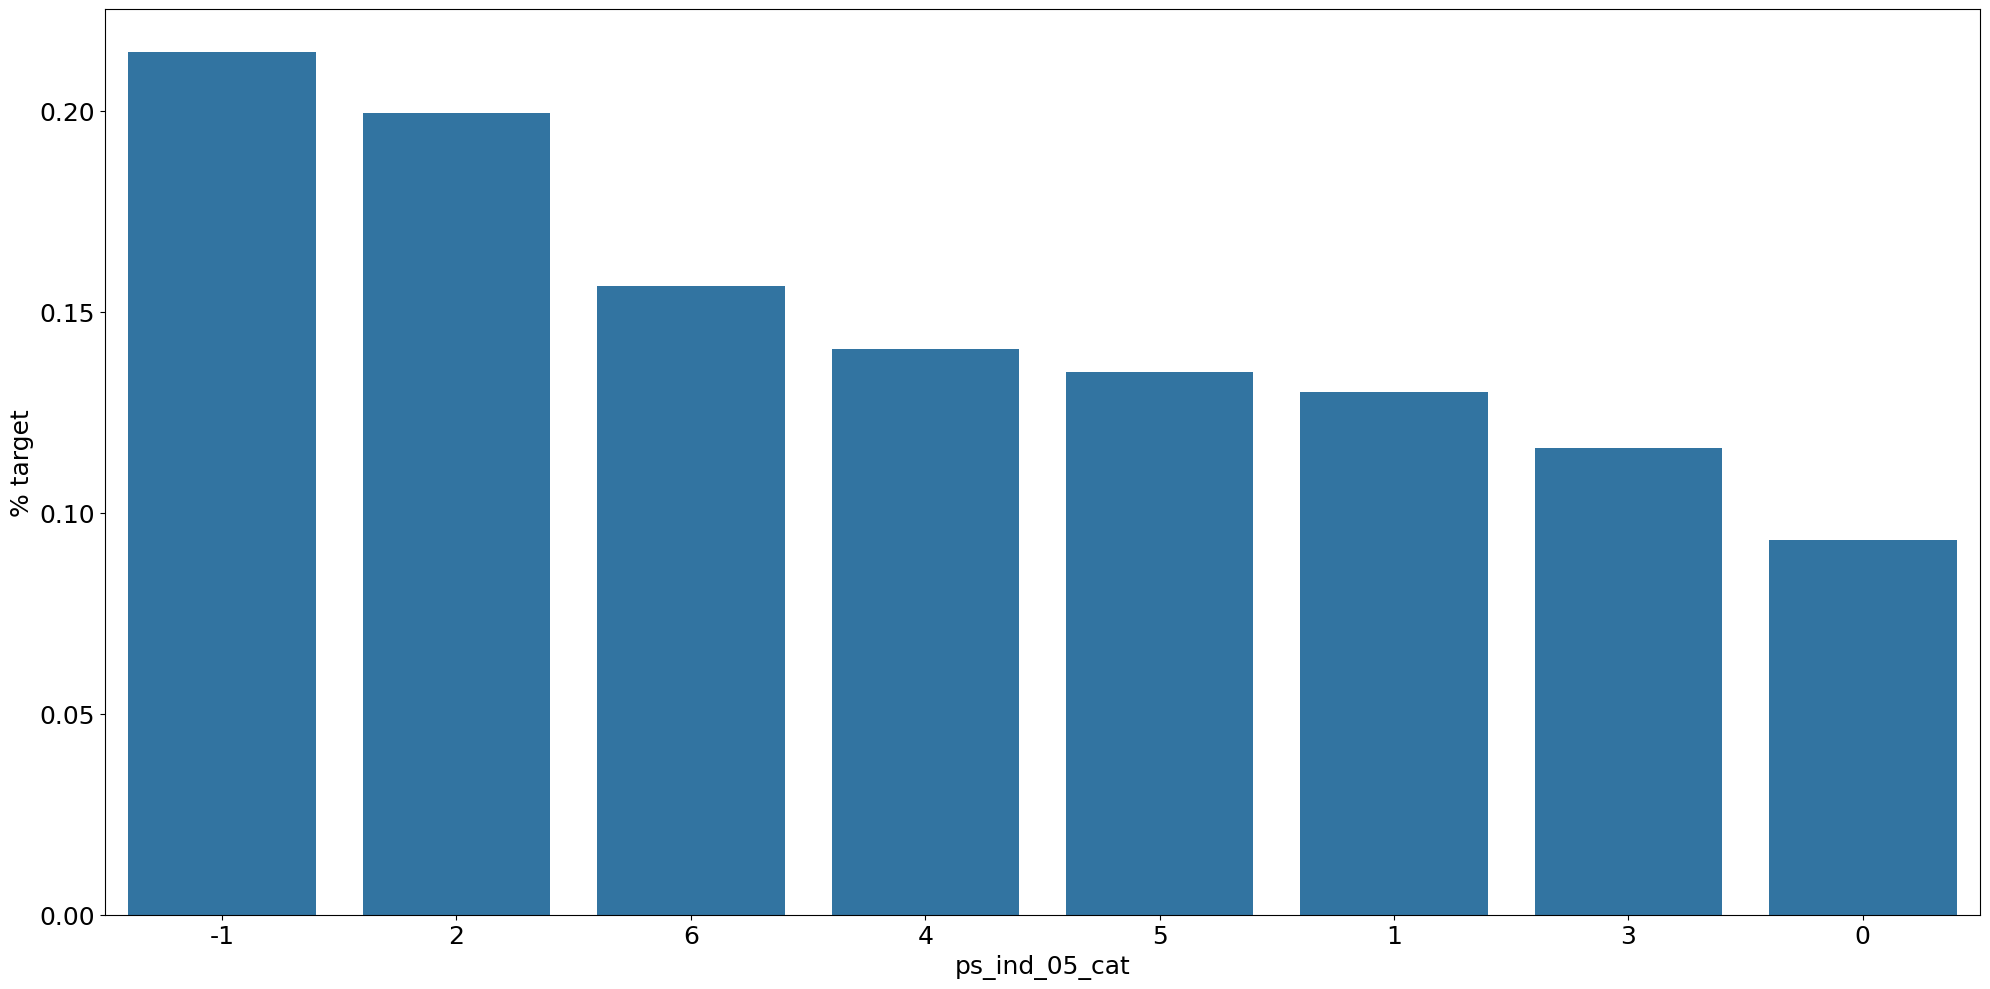

<Figure size 640x480 with 0 Axes>

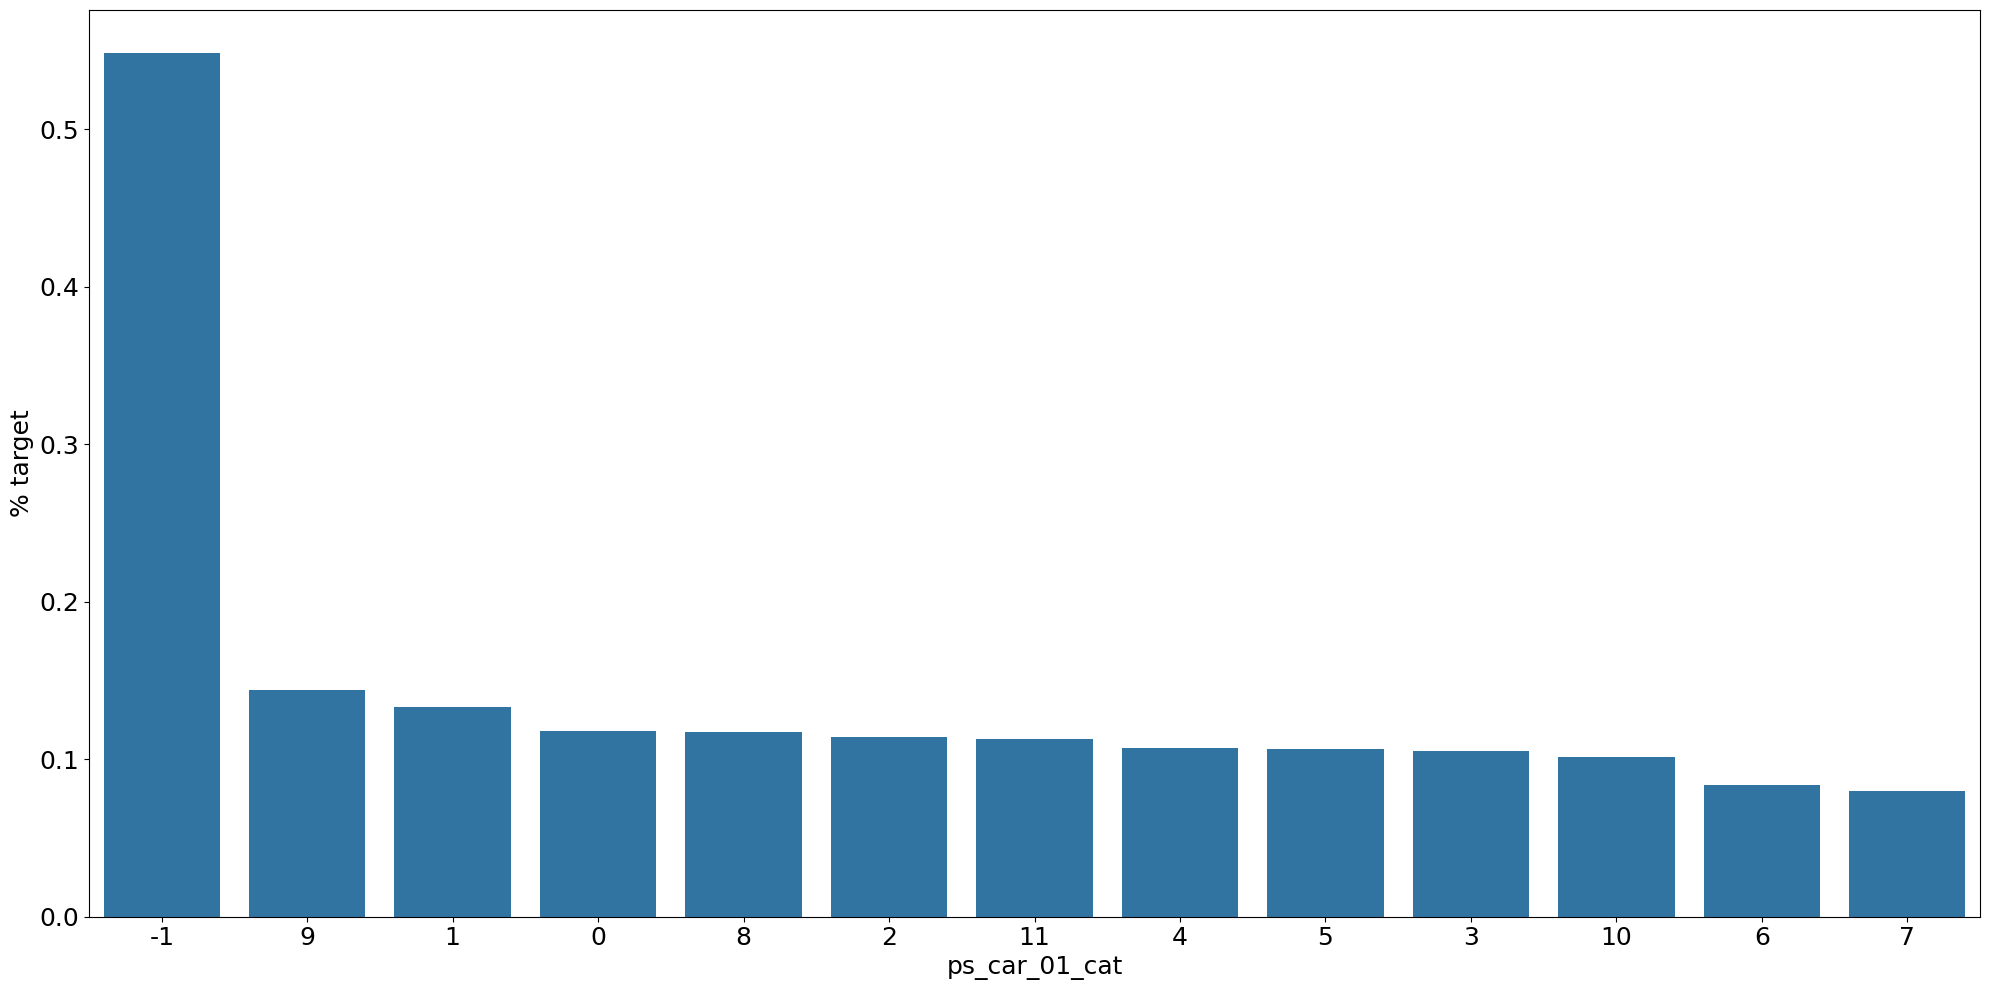

<Figure size 640x480 with 0 Axes>

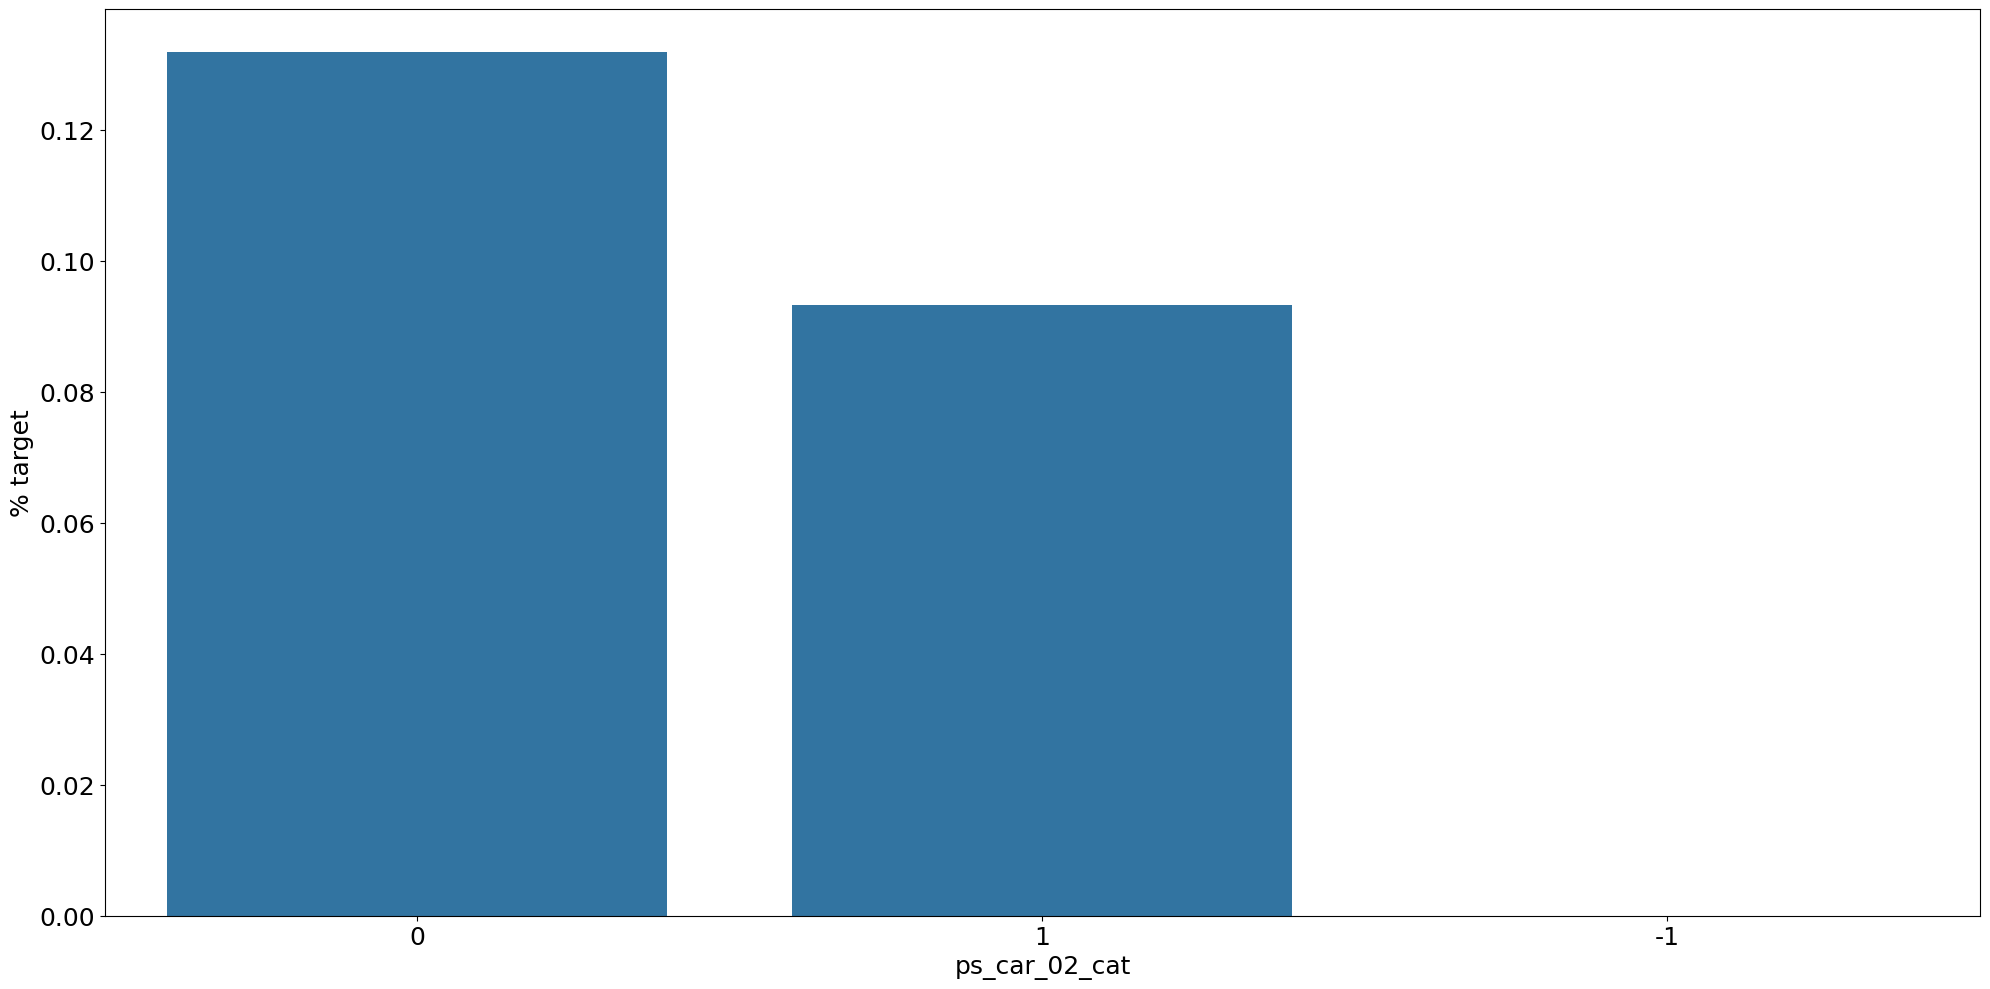

<Figure size 640x480 with 0 Axes>

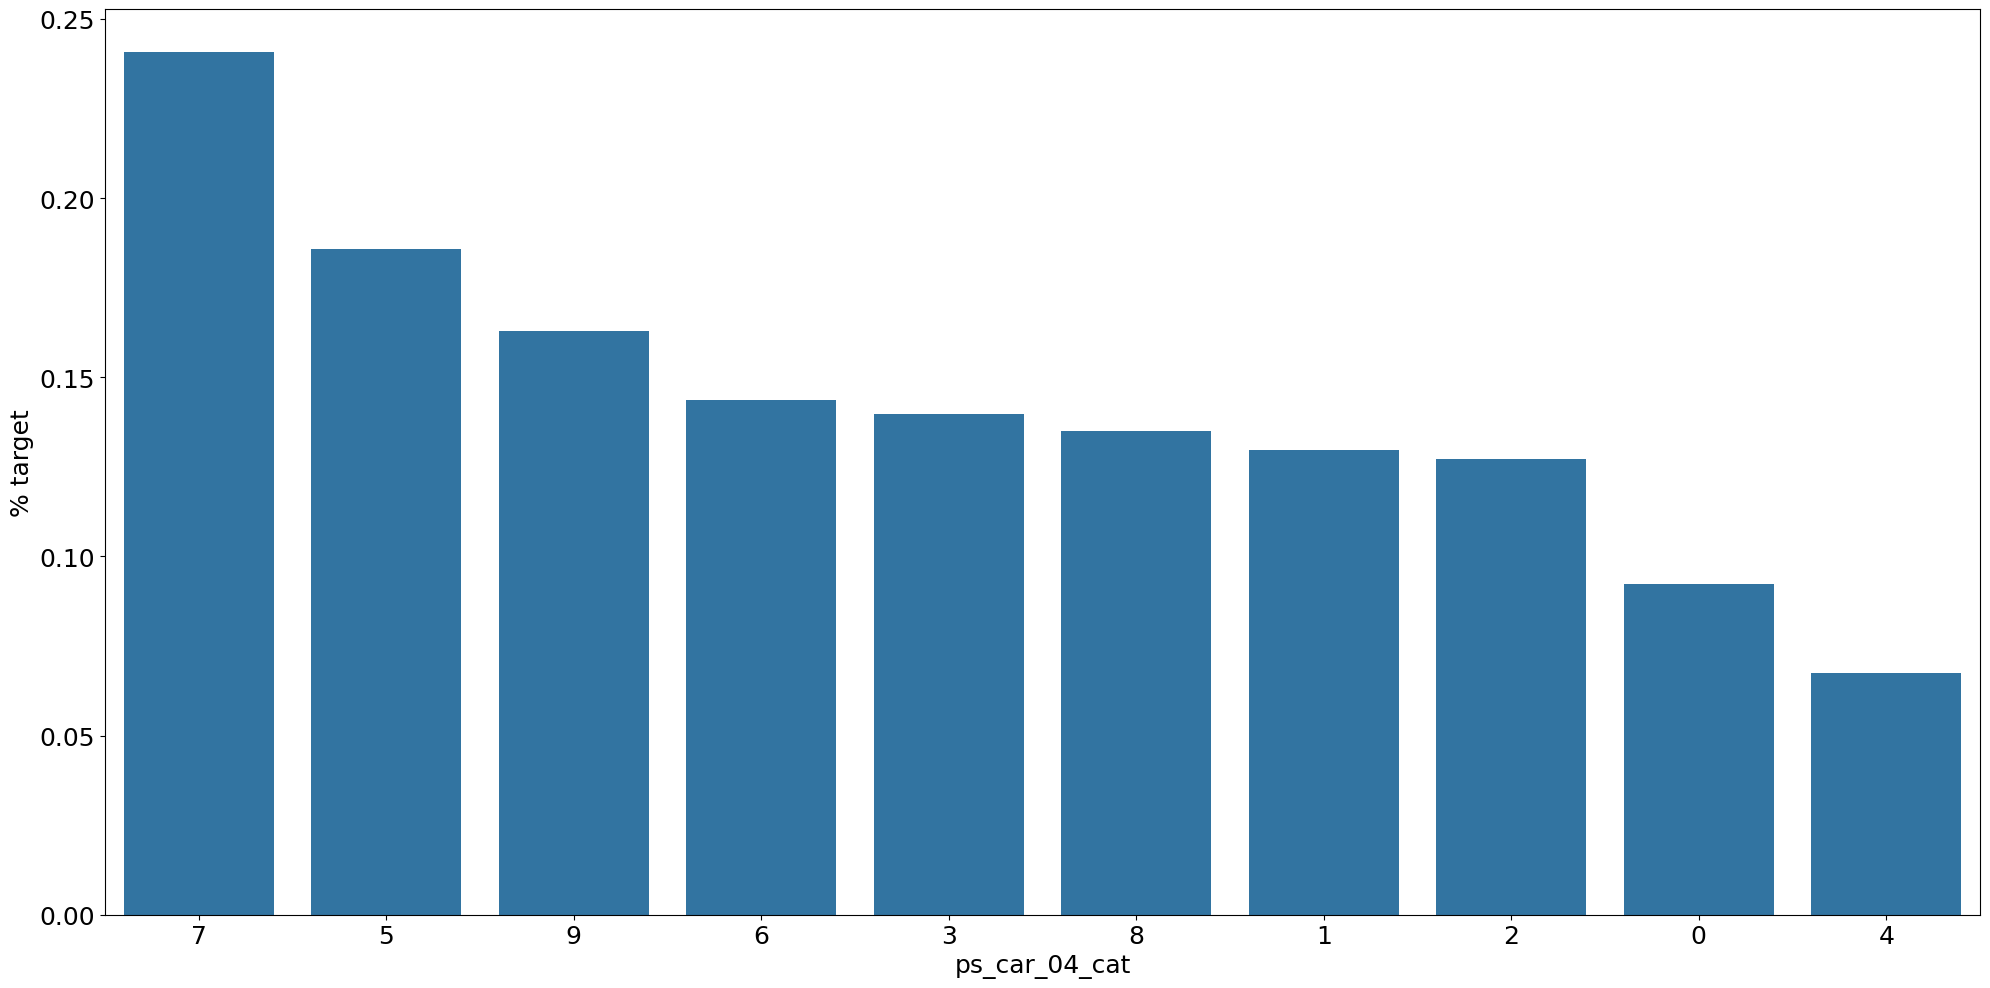

<Figure size 640x480 with 0 Axes>

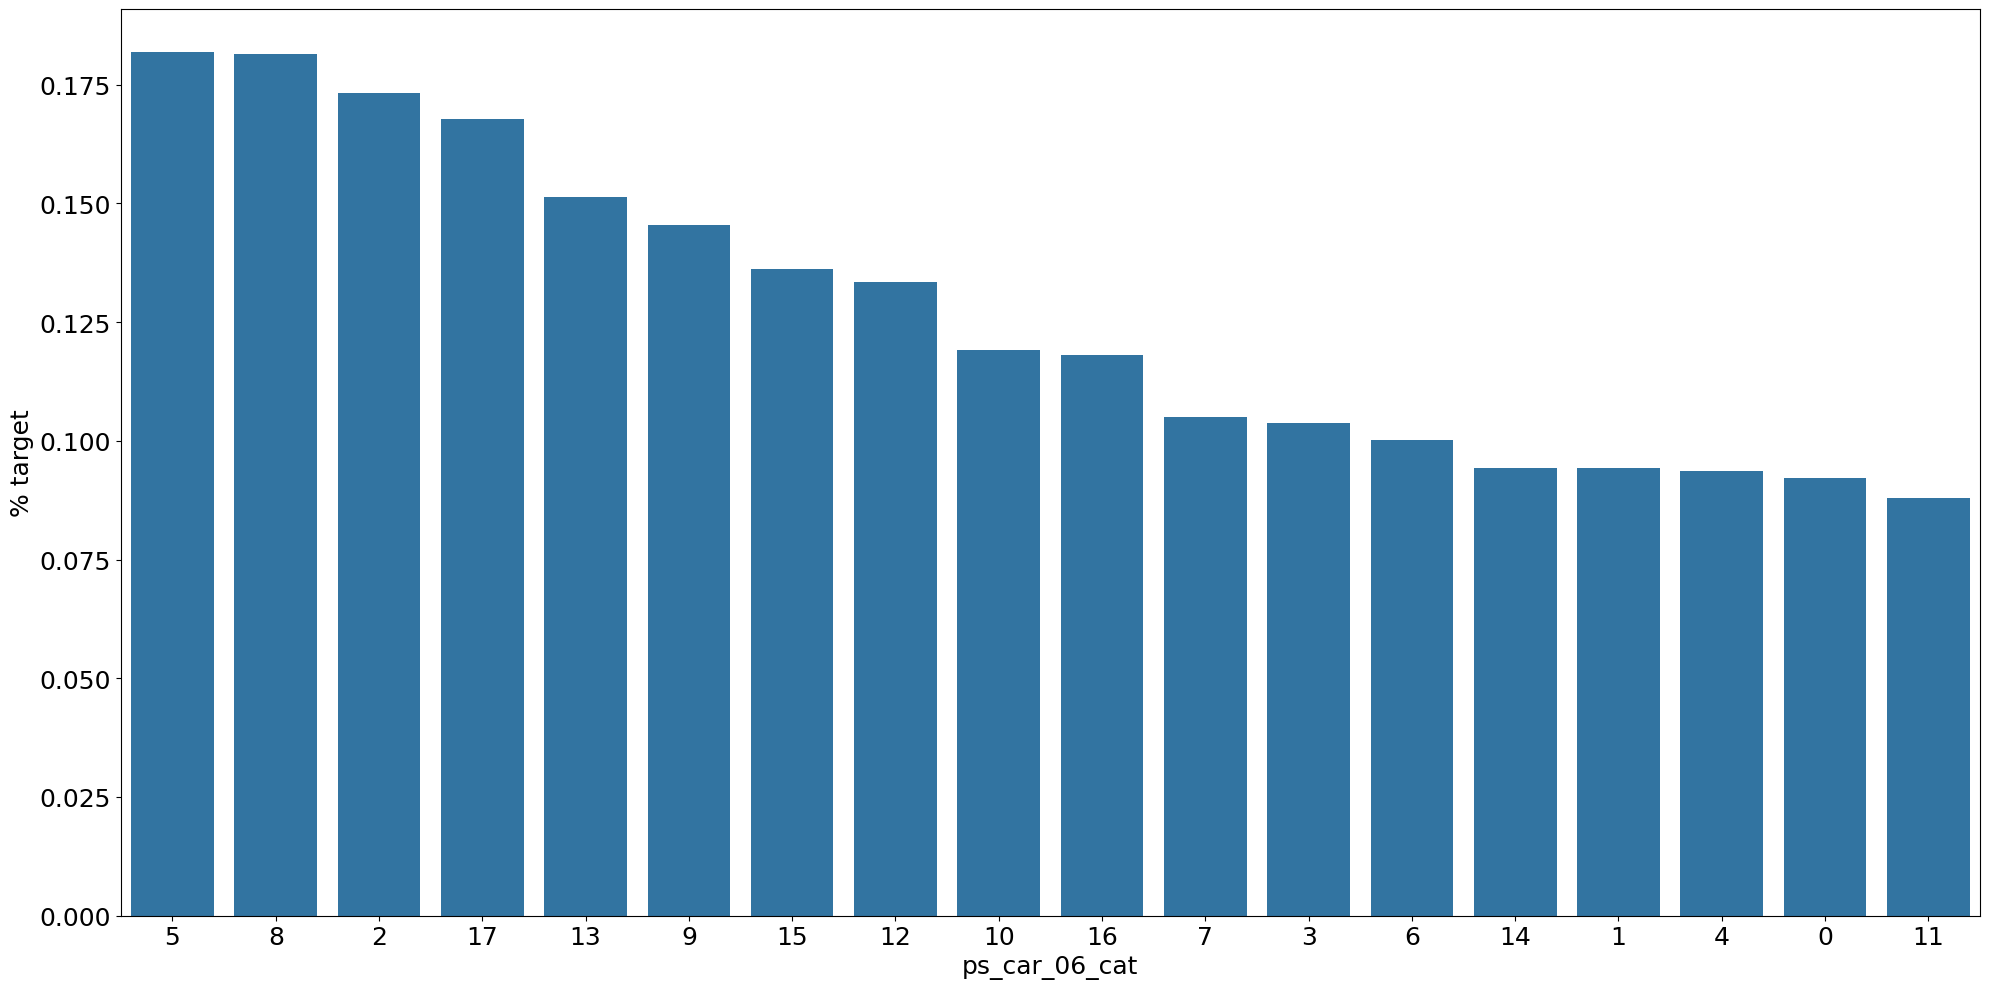

<Figure size 640x480 with 0 Axes>

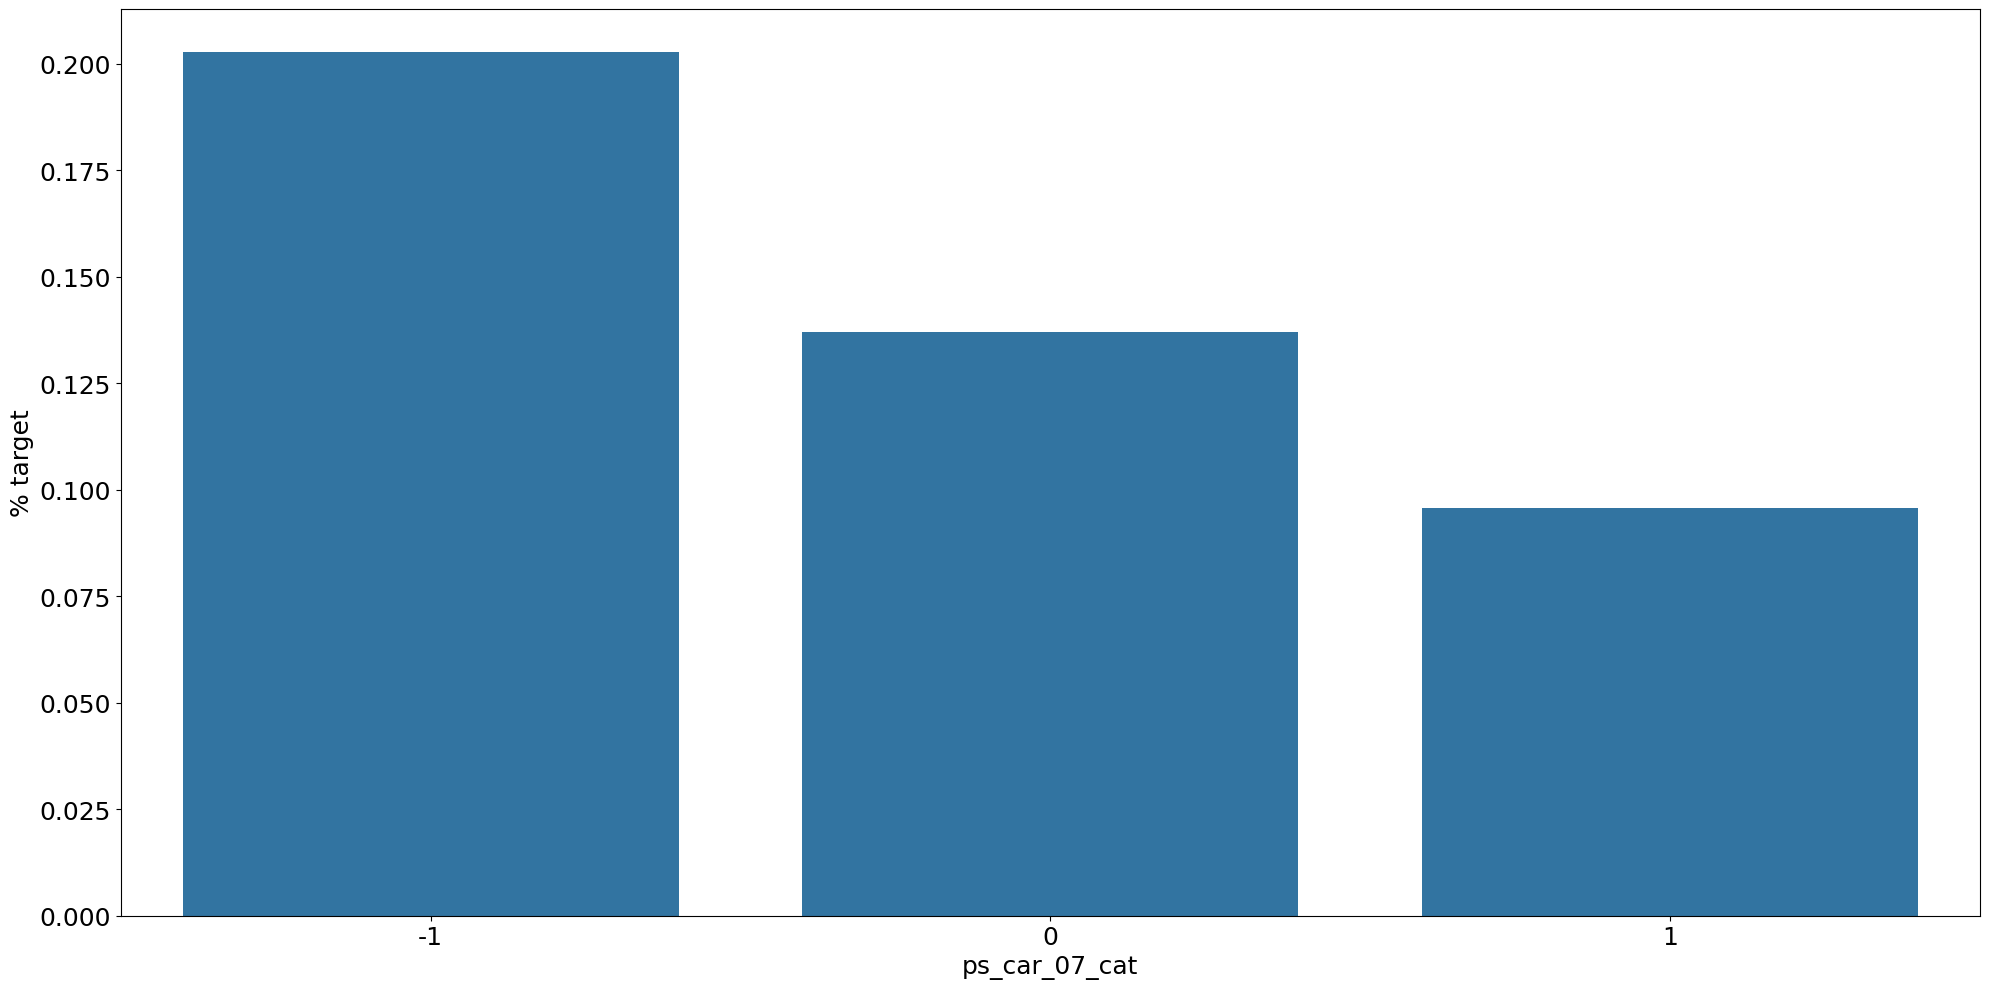

<Figure size 640x480 with 0 Axes>

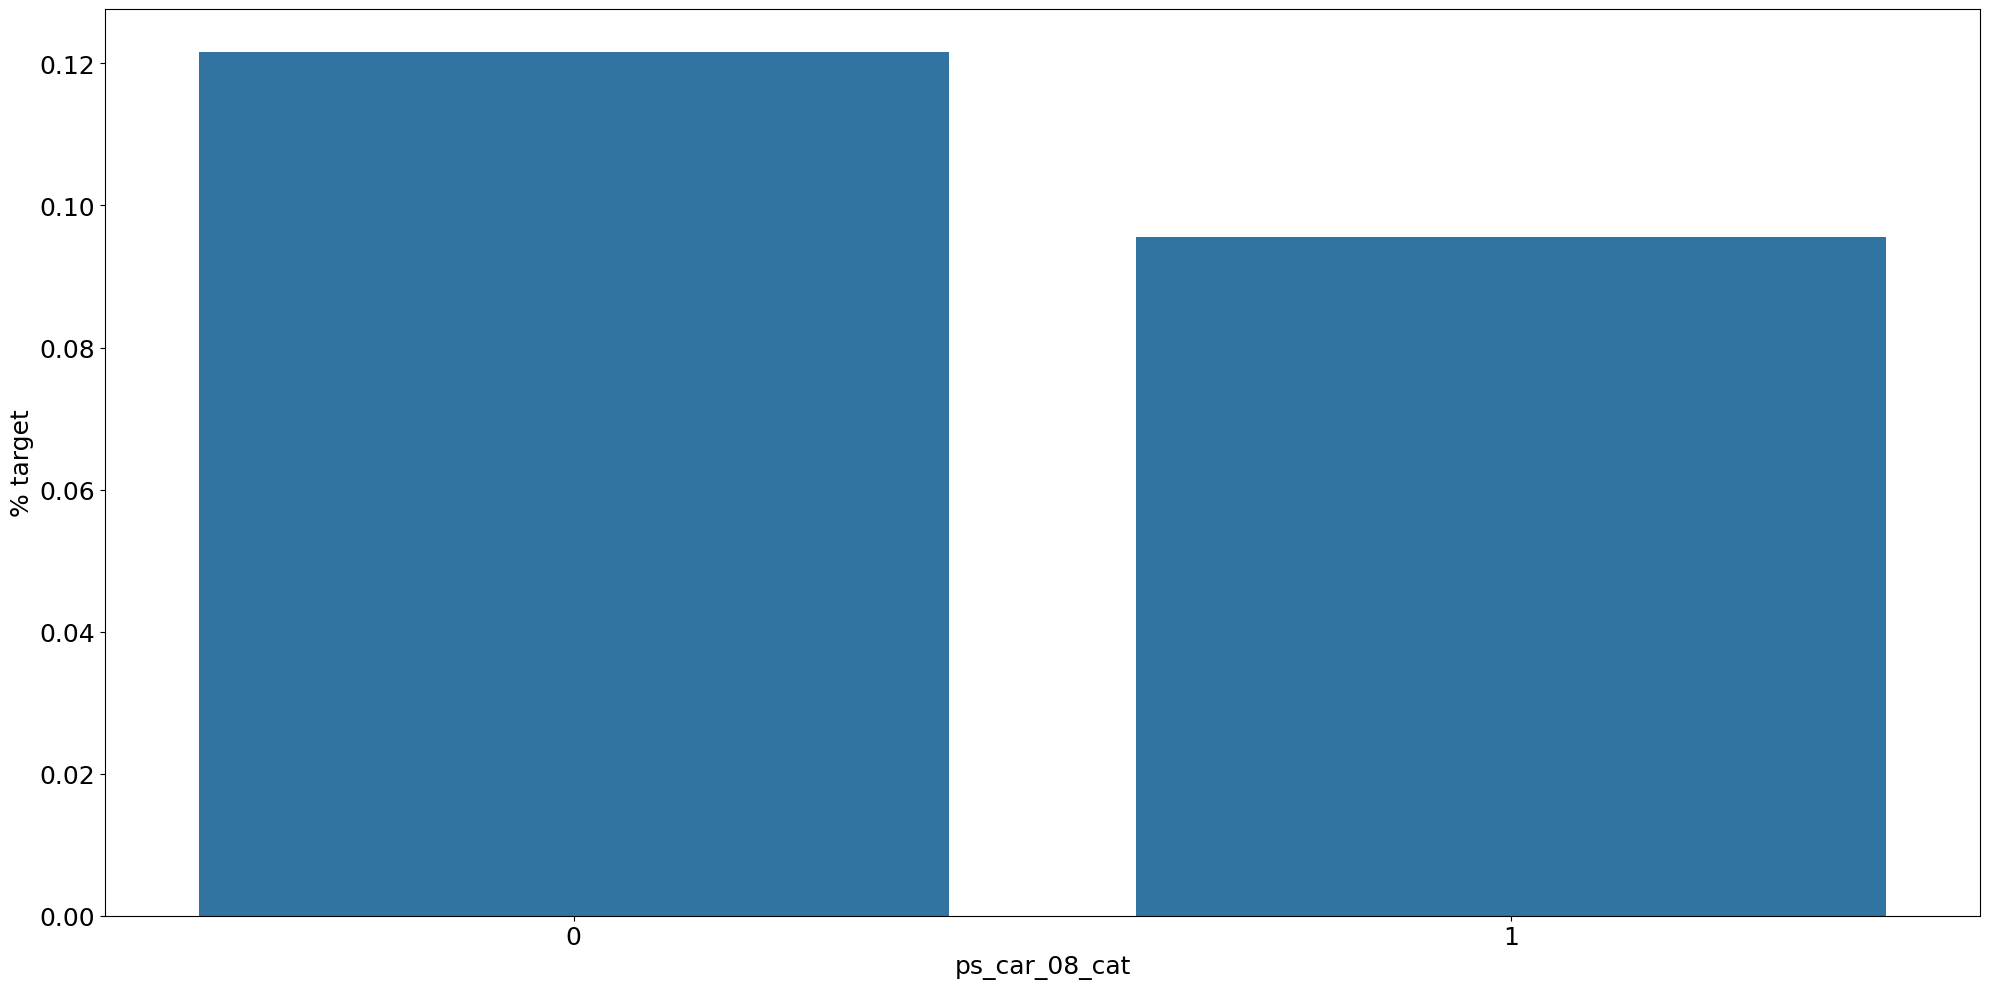

<Figure size 640x480 with 0 Axes>

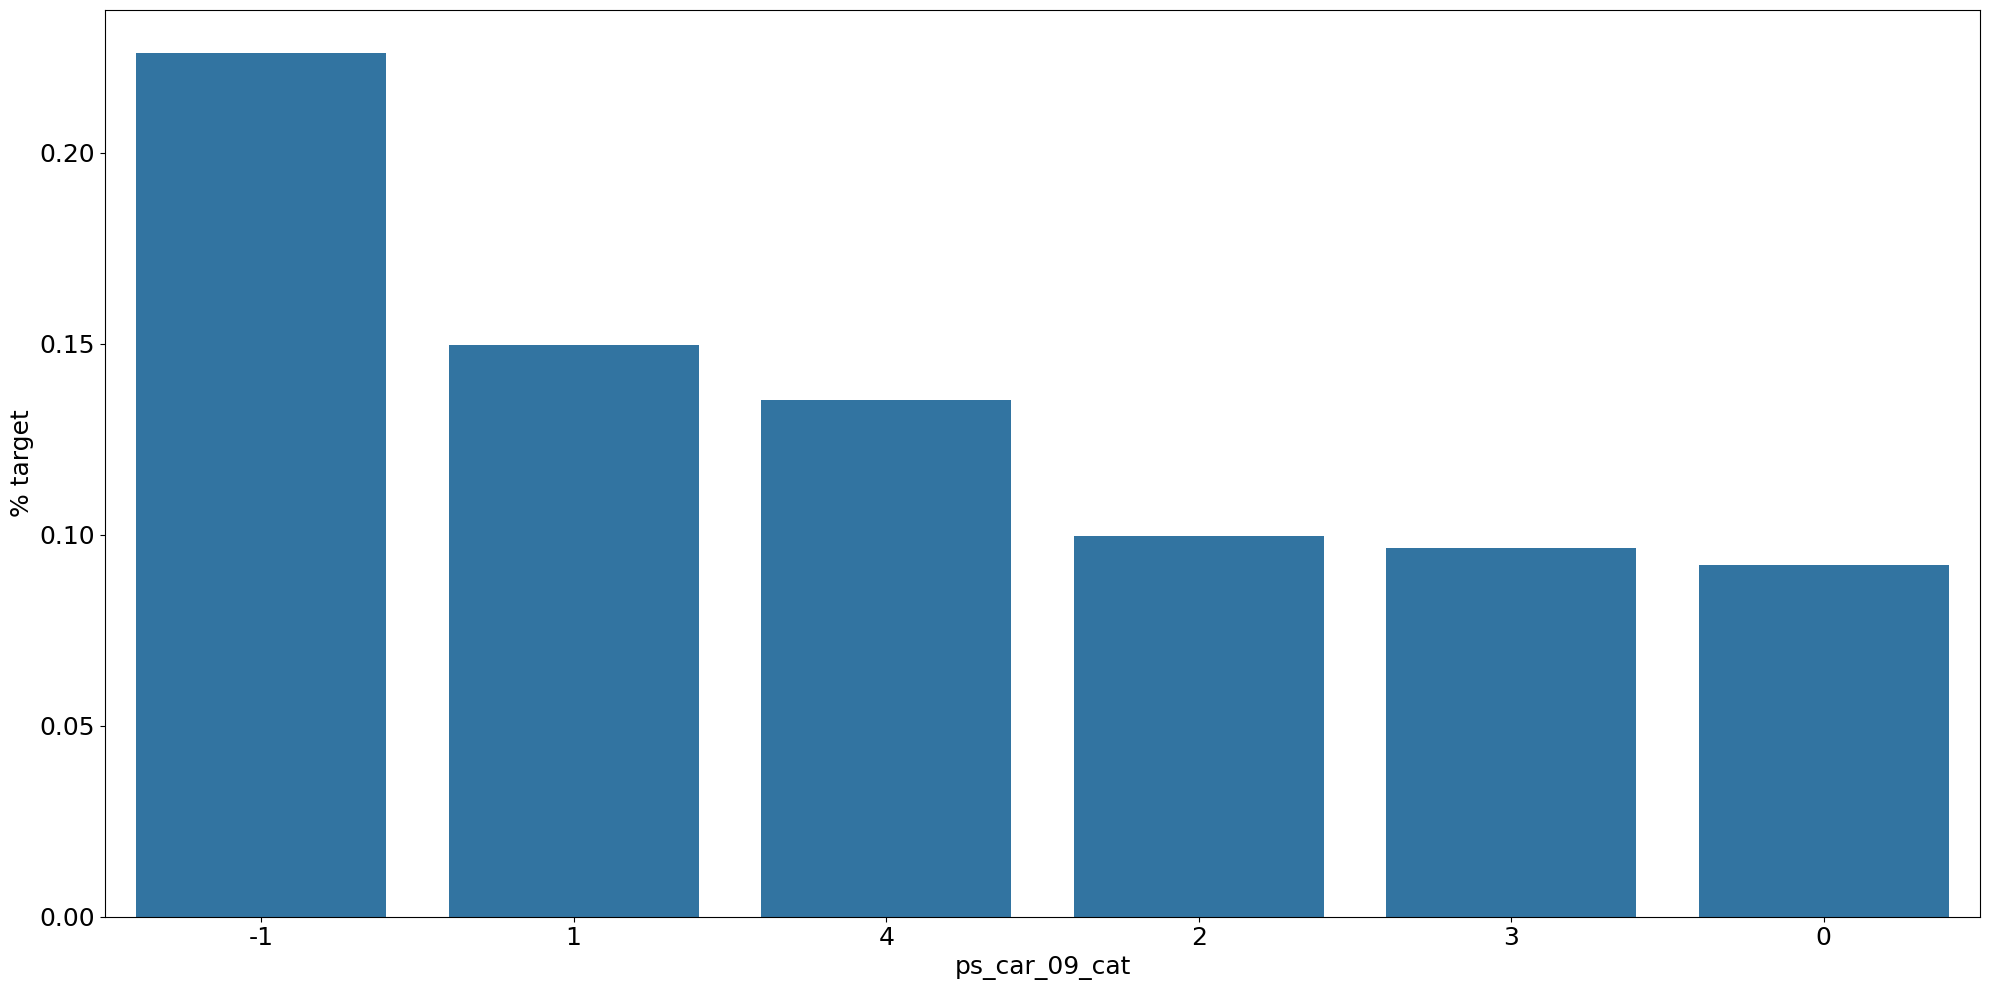

<Figure size 640x480 with 0 Axes>

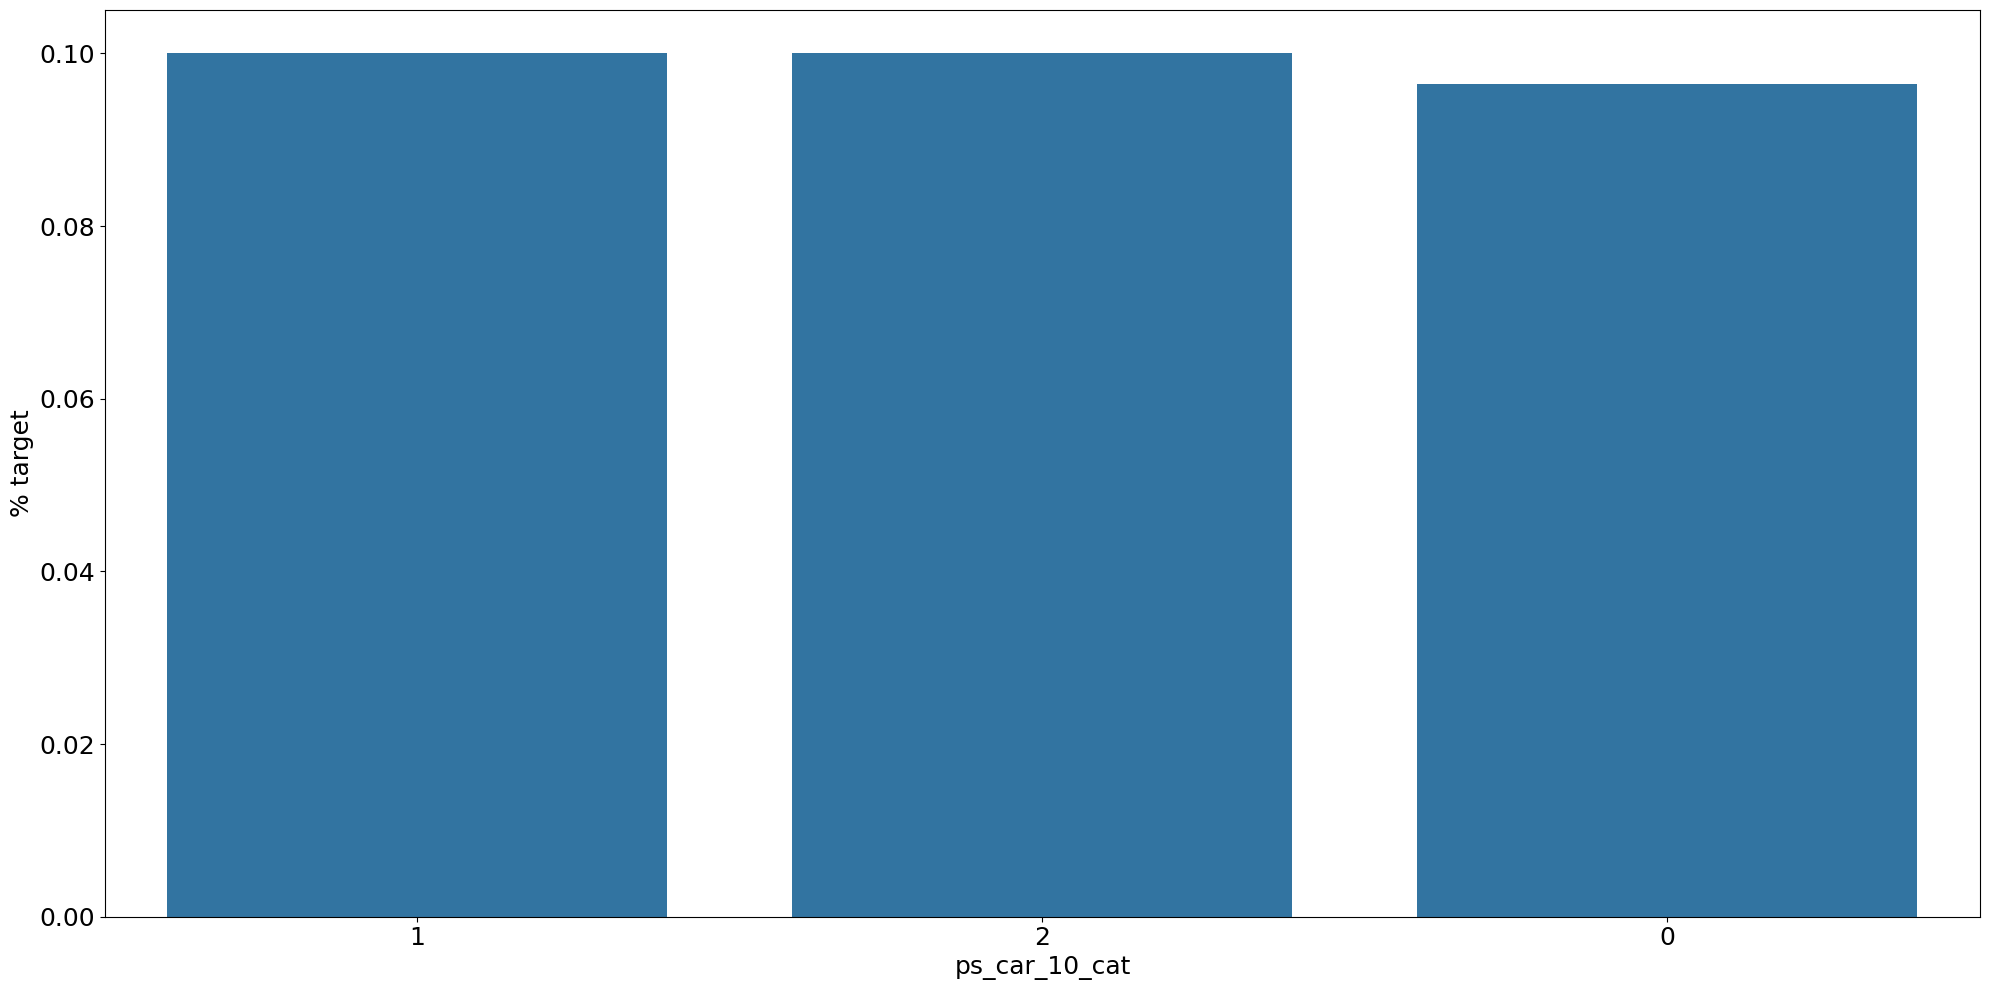

In [27]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index

for f in v:
    plt.figure()
    fig, ax = plt.subplots(figsize=(20,10))

    cat_perc = train[[f, 'target']].groupby([f],as_index=False).mean()
    cat_perc.sort_values(by='target', ascending=False, inplace=True)

    sns.barplot(ax=ax, x=f, y='target', data=cat_perc, order=cat_perc[f])
    plt.ylabel('% target', fontsize=18)
    plt.xlabel(f, fontsize=18)
    plt.tick_params(axis='both', which='major', labelsize=18)
    plt.tight_layout()
    plt.show();

결측치가 있는 변수들을 보면, 결측치를 최빈값으로 대체하는 것보다 결측치를 별도의 범주 값으로 유지하는 것이 더 좋다는 걸 알 수 있다.  
결측치가 있는 고객들은 보험 청구를 할 확률이 훨씬 높거나(또는 낮은 경우도 있음) 경향이 있기 때문이다.

### Interval variables

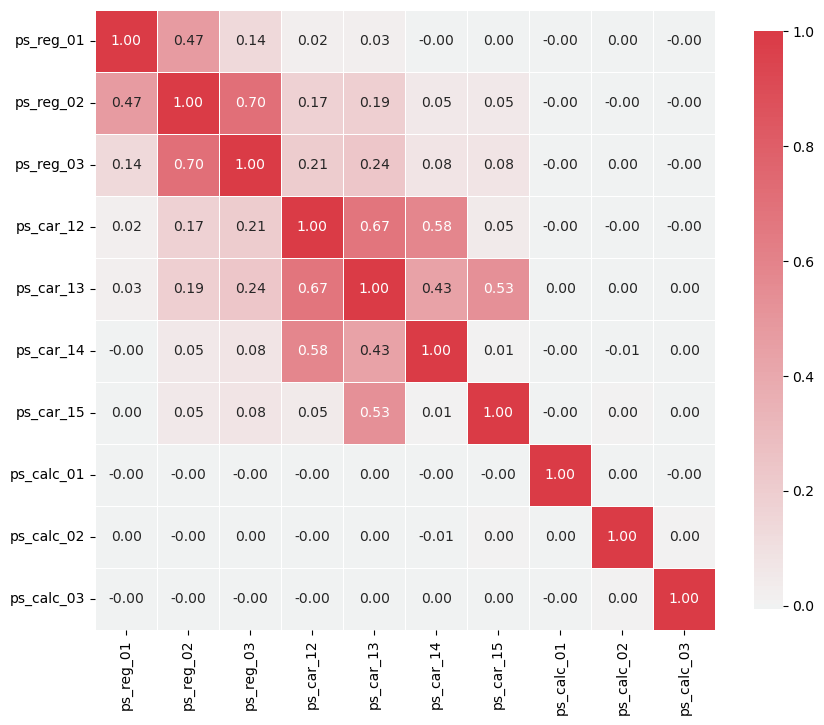

In [28]:
def corr_heatmap(v):
    correlations = train[v].corr()

    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show();
    
v = meta[(meta.level == 'interval') & (meta.keep)].index
corr_heatmap(v)

- ps_reg_02 와 ps_reg_03 : 상관계수 0.7
- ps_car_12 와 ps_car_13 : 상관계수 0.67
- ps_car_12 와 ps_car_14 : 상관계수 0.58
- ps_car_13 와 ps_car_15 : 상관계수 0.67  


In [31]:
s = train.sample(frac=0.1) # 분석 속도를 빠르게 하기 위해 train 데이터 중 일부 샘플을 사용한다

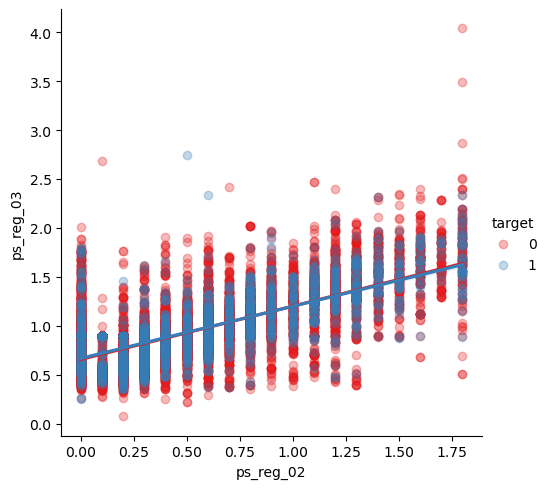

In [32]:
sns.lmplot(x='ps_reg_02', y='ps_reg_03', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_reg_02와 ps_reg_03 변수 사이에는 회귀선으로 봤을 때 선형적인 관계(linear relationship)가 존재한다.  
즉, 두 변수 간의 관계는 타겟(보험 청구 여부 등)에 따라 크게 달라지지 않는다는 의미

ps_car_12 and ps_car_13

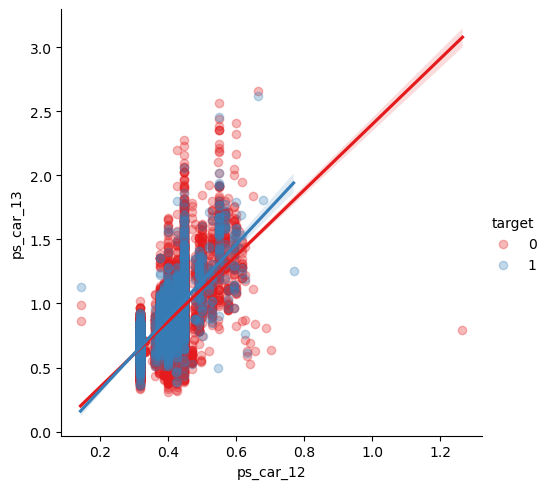

In [34]:
sns.lmplot(x='ps_car_12', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_12 and ps_car_14

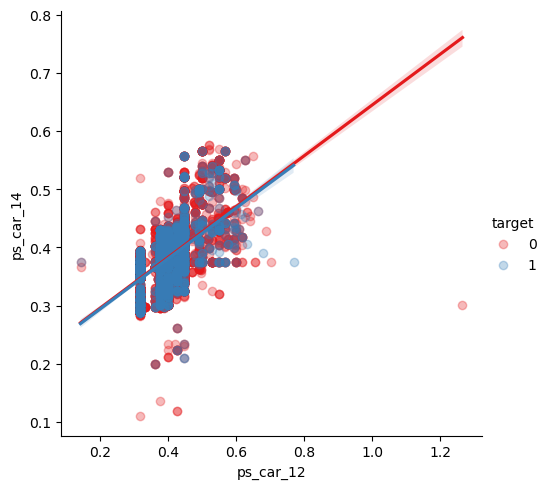

In [35]:
sns.lmplot(x='ps_car_12', y='ps_car_14', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

ps_car_13 and ps_car_15

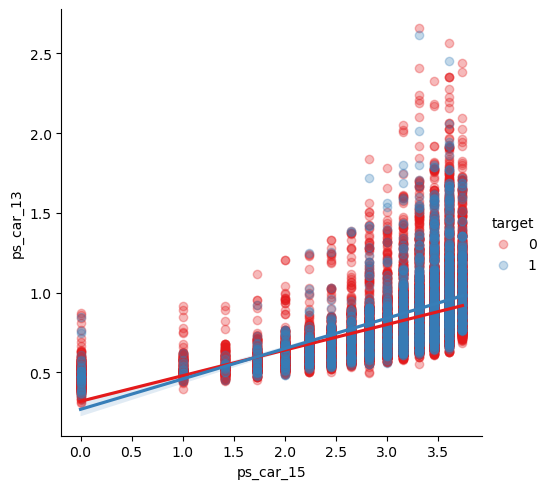

In [36]:
sns.lmplot(x='ps_car_15', y='ps_car_13', data=s, hue='target', palette='Set1', scatter_kws={'alpha':0.3})
plt.show()

주성분 분석(PCA)을 이용해서 변수의 차원을 줄일 수 있다.  
하지만 여기서는 상관관계가 높은 변수가 많지 않기 때문에,복잡한 차원 축소보다 모델에 맡기도록 한다.  
즉, 변수 간 중복 정보가 아주 많지 않아서, 모델이 학습 과정에서 알아서 중요한 변수들을 잘 선택하도록 하겠다는 뜻이다.  
따라서 지금은 별도의 변수 제거나 차원 축소를 하지 않고, 그대로 모델에 넣도록 한다.  

### Checking the correlations between ordinal variables

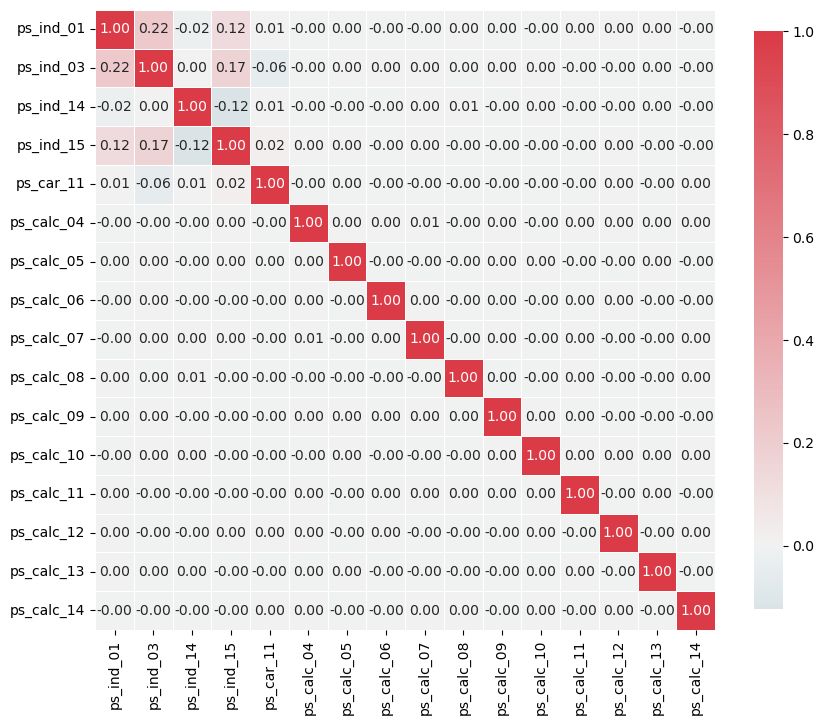

In [37]:
v = meta[(meta.level == 'ordinal') & (meta.keep)].index
corr_heatmap(v)

순서형 변수들 간에는 뚜렷한 상관관계가 보이지 않는다.  
하지만 target 값으로 그룹을 나우었을 때, 각 변수의 분포가 어떻게 달라지는 지 살펴볼 수 있다.  
즉, 순서형 변수들끼리는 서로 강한 상관관계가 없지만, 그 변수가 target에 따라 어떤 분포 차이가 있는지를 분석하도록 한다.  
이걸 통해 해당 변수들이 보험 청구 예측에 어떤 영향을 미칠지 감을 잡을 수 있다.


### Feature engineering

범주형 변수 -> 더미 변수로 변환하는 과정  
더미 변수 생성 시, 첫 번째 더미 변수는 버린다(drop_first=True).  
이는 첫 번째 카테고리 값은 나머지 더미 변수들의 값으로 유추할 수 있기 때문에 중복 정보를 제거하는 방법이다.

In [38]:
v = meta[(meta.level == 'nominal') & (meta.keep)].index
print('Before dummification we have {} variables in train'.format(train.shape[1]))
train = pd.get_dummies(train, columns=v, drop_first=True)
print('After dummification we have {} variables in train'.format(train.shape[1]))

Before dummification we have 57 variables in train
After dummification we have 109 variables in train


명목형 변수 -> 더미 변수

### Creating interaction variables
상호작용 변수와 다항식 변수를 만드는 과정

In [42]:
v = meta[(meta.level == 'interval') & (meta.keep)].index
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False) # 2차 다항식 변수까지 생성
interactions = pd.DataFrame(data=poly.fit_transform(train[v]), columns=poly.get_feature_names_out(v)) # get_feature_names -> get_feature_names_out
interactions.drop(v, axis=1, inplace=True)

print('Before creating interactions we have {} variables in train'.format(train.shape[1]))
train = pd.concat([train, interactions], axis=1)
print('After creating interactions we have {} variables in train'.format(train.shape[1]))

Before creating interactions we have 164 variables in train
After creating interactions we have 219 variables in train


interaction variables 추가  
- 다항 특징(PolynomialFeatures)을 사용해 변수들 간의 상호작용(interaction)을 포함하는 새로운 특징들을 생성
- get_feature_names (또는 최신 버전에서는 get_feature_names_out)를 이용해 이 새로운 변수들의 이름을 지정해 데이터프레임 컬럼으로 붙였다.

### 특징 선택(Feature selection)
모든 변수를 모델에 넣기보다, 의미 없는 변수를 제거하면 모델 성능과 학습 속도에 도움이 될 수 있다.  
- 분산이 거의 없는 변수 제거  
    분산이 0인 변수(즉, 모든 샘플에서 동일한 값)들은 정보를 전혀 주지 않으므로 제거하는 것이 좋다. sklearn의 VarianceThreshold가 이를 자동으로 처리해준다.
  
- 실제 적용 여부  
  이번 데이터셋에서는 아예 분산이 0인 변수가 없어서 VarianceThreshold 기본 설정으로는 제거되는 변수가 없었다. 하지만 만약 분산이 1% 미만인 변수까지 제거한다면 31개의 변수가 제거될 것이라는 설명도 포함되어 있다.

### 분산이 너무 낮은 변수들을 찾아내는 작업

In [43]:
selector = VarianceThreshold(threshold=.01) # 분산이 0.01 이하인 변수를 낮은 분산으로 간주한다.
selector.fit(train.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # 분산이 낮은 변수들을 True로 표시하는 역할

#결과적으로 분산이 낮은 변수들의 이름을 가져온다.
v = train.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

31 variables have too low variance.
These variables are ['ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_car_12', 'ps_car_14', 'ps_car_11_cat_te', 'ps_ind_05_cat_2', 'ps_ind_05_cat_5', 'ps_car_01_cat_1', 'ps_car_01_cat_2', 'ps_car_04_cat_3', 'ps_car_04_cat_4', 'ps_car_04_cat_5', 'ps_car_04_cat_6', 'ps_car_04_cat_7', 'ps_car_06_cat_2', 'ps_car_06_cat_5', 'ps_car_06_cat_8', 'ps_car_06_cat_12', 'ps_car_06_cat_16', 'ps_car_06_cat_17', 'ps_car_09_cat_4', 'ps_car_10_cat_1', 'ps_car_10_cat_2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2', 'ps_car_12^2', 'ps_car_12 ps_car_14', 'ps_car_14^2']


- 분산(Variance) 기준으로 변수를 선택하면 너무 많은 변수가 사라질 수 있어서, 지금처럼 변수 개수가 적은 데이터셋에서는 모델에 맡기는 게 더 낫다.

- 변수 개수가 많은 큰 데이터셋에서는 분산 기준 필터링이 처리 시간을 크게 줄여줄 수 있다.

- sklearn에는 분산 기반 외에도 다양한 특징 선택(feature selection) 방법이 있다.

- 그중 하나가 SelectFromModel인데, 다른 머신러닝 모델(예: Random Forest)의 특성 중요도(feature importance)를 기준으로 중요한 변수만 골라내는 방법이다.

- 예를 들어, Random Forest를 사용해 변수 중요도를 계산하고, 상위 50% 변수만 선택할 수 있다.

- 이렇게 하면 모델이 직접 중요 변수를 골라서 성능과 효율성을 높일 수 있다.

In [ ]:
X_train = train.drop(['id', 'target'], axis=1)
y_train = train['target']

feat_labels = X_train.columns

rf = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rf.fit(X_train, y_train)
importances = rf.feature_importances_

indices = np.argsort(rf.feature_importances_)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,feat_labels[indices[f]], importances[indices[f]]))

In [ ]:
sfm = SelectFromModel(rf, threshold='median', prefit=True) # rf -> 이미 학습이 끝난 랜덤포레스트 모델
# 특성 중요도의 중간값을 기준으로 이 값보다 높은 변수들만 선택

print('Number of features before selection: {}'.format(X_train.shape[1])) # 선택 전 변수 개수 
n_features = sfm.transform(X_train).shape[1] 
print('Number of features after selection: {}'.format(n_features))
selected_vars = list(feat_labels[sfm.get_support()]) # 선택 후 변수 수수

In [ ]:
train = train[selected_vars + ['target']] # 선택된 변수 리스트를 뽑아서 train 데이터셋에서 해당 변수들과 타겟 컬럼만 남김

### Feature scaling¶

In [ ]:
scaler = StandardScaler() # 평균이 0, 표준편차가 1인 표준화 수행
scaler.fit_transform(train.drop(['target'], axis=1))

Conclusion¶
Hopefully this notebook helped you with some tips on how to start with this competition. Feel free to vote for it. And if you have questions, post a comment.